<a href="https://colab.research.google.com/github/AbhinavRobinson/I_Learn_TensorFlow/blob/master/overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
NUM_WORDS = 10000

(train_data, train_labels) , (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

def multi_hot_sequences(sequences , dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension = NUM_WORDS)

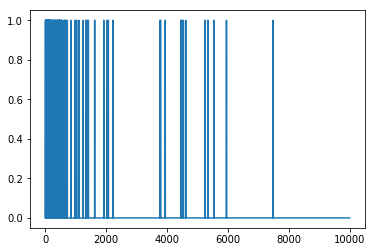

In [5]:
plt.plot(train_data[0])

In [8]:
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation=tf.nn.relu, input_shape = (NUM_WORDS, )),
  keras.layers.Dense(16, activation=tf.nn.relu),
  keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy' , 'binary_crossentropy'])

baseline_model.summary()

W0825 12:34:50.527499 139983151851392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0825 12:34:50.650568 139983151851392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data,test_labels),
                                      verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4906 - acc: 0.8039 - binary_crossentropy: 0.4906 - val_loss: 0.3372 - val_acc: 0.8744 - val_binary_crossentropy: 0.3372
Epoch 2/20
25000/25000 - 5s - loss: 0.2468 - acc: 0.9119 - binary_crossentropy: 0.2468 - val_loss: 0.2843 - val_acc: 0.8874 - val_binary_crossentropy: 0.2843
Epoch 3/20
25000/25000 - 5s - loss: 0.1780 - acc: 0.9370 - binary_crossentropy: 0.1780 - val_loss: 0.2965 - val_acc: 0.8822 - val_binary_crossentropy: 0.2965
Epoch 4/20
25000/25000 - 4s - loss: 0.1442 - acc: 0.9505 - binary_crossentropy: 0.1442 - val_loss: 0.3347 - val_acc: 0.8717 - val_binary_crossentropy: 0.3347
Epoch 5/20
25000/25000 - 5s - loss: 0.1179 - acc: 0.9598 - binary_crossentropy: 0.1179 - val_loss: 0.3479 - val_acc: 0.8729 - val_binary_crossentropy: 0.3479
Epoch 6/20
25000/25000 - 4s - loss: 0.0964 - acc: 0.9699 - binary_crossentropy: 0.0964 - val_loss: 0.3823 - val_acc: 0.8697 - val_binary_crossentropy: 0.3823
Ep

In [10]:
smaller_model = keras.Sequential([
  keras.layers.Dense(4, activation = tf.nn.relu, input_shape = (NUM_WORDS , )),
  keras.layers.Dense(4, activation = tf.nn.relu),
  keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy' , 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs = 20,
                                    batch_size = 512,
                                    validation_data=(test_data, test_labels),
                                    verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6113 - acc: 0.7726 - binary_crossentropy: 0.6113 - val_loss: 0.5174 - val_acc: 0.8483 - val_binary_crossentropy: 0.5174
Epoch 2/20
25000/25000 - 4s - loss: 0.4237 - acc: 0.8806 - binary_crossentropy: 0.4237 - val_loss: 0.3895 - val_acc: 0.8730 - val_binary_crossentropy: 0.3895
Epoch 3/20
25000/25000 - 4s - loss: 0.3147 - acc: 0.9026 - binary_crossentropy: 0.3147 - val_loss: 0.3290 - val_acc: 0.8808 - val_binary_crossentropy: 0.3290
Epoch 4/20
25000/25000 - 4s - loss: 0.2551 - acc: 0.9177 - binary_crossentropy: 0.2551 - val_loss: 0.2998 - val_acc: 0.8865 - val_binary_crossentropy: 0.2998
Epoch 5/20
25000/25000 - 4s - loss: 0.2177 - acc: 0.9283 - binary_crossentropy: 0.2177 - val_loss: 0.2872 - val_acc: 0.8889 - val_binary_crossentropy: 0.2872
Epoch 6/20
25000/25000 - 3s - loss: 0.1919 - acc: 0.9362 - binary_crossentropy: 0.1919 - val_loss: 0.2823 - val_acc: 0.8891 - val_binary_crossentropy: 0.2823
Ep

In [15]:
bigger_model = keras.models.Sequential([
  keras.layers.Dense(512, activation = tf.nn.relu , input_shape=(NUM_WORDS, )),
  keras.layers.Dense(512, activation = tf.nn.relu),
  keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

bigger_model.compile(optimizer = 'adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs = 20,
                                  batch_size = 512,
                                  validation_data=(test_data, test_labels),
                                  verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 17s - loss: 0.3475 - acc: 0.8495 - binary_crossentropy: 0.3475 - val_loss: 0.3168 - val_acc: 0.8685 - val_binary_crossentropy: 0.3168
Epoch 2/20
25000/25000 - 16s - loss: 0.1428 - acc: 0.9483 - binary_crossentropy: 0.1428 - val_loss: 0.3275 - val_acc: 0.8747 - val_binary_crossentropy: 0.3275
Epoch 3/20
25000/25000 - 16s - loss: 0.0448 - acc: 0.9866 - binary_crossentropy: 0.0448 - val_loss: 0.4431 - val_acc: 0.8706 - val_binary_crossentropy: 0.4431
Epoch 4/20
25000/25000 - 17s - loss: 0.0068 - acc: 0.9988 - binary_crossentropy: 0.0068 - val_loss: 0.5758 - val_acc: 0.8706 - val_binary_crossentropy: 0.5758
Epoch 5/20
25000/25000 - 17s - loss: 0.0013 - acc: 0.9999 - binary_crossentropy: 0.0013 - val_loss: 0.6748 - val_acc: 0.8690 - val_binary_crossentropy: 0.6748
Epoch 6/20
25000/25000 - 17s - loss: 3.7070e-04 - acc: 1.0000 - binary_crossentropy: 3.7070e-04 - val_loss: 0.7140 - val_acc: 0.8709 - val_binary_crossentr

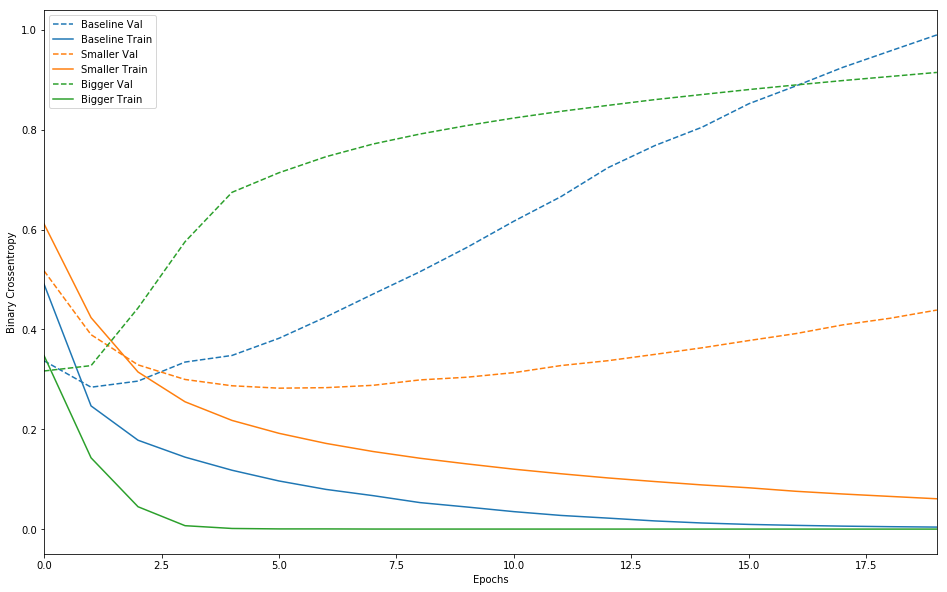

In [17]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [21]:
l2_model = keras.models.Sequential([
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation = tf.nn.relu, input_shape = (NUM_WORDS, )),
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation = tf.nn.relu),
  keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

l2_model.compile(optimizer= 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size = 512,
                                validation_data= (test_data, test_labels),
                                verbose= 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5073 - acc: 0.8111 - binary_crossentropy: 0.4683 - val_loss: 0.3678 - val_acc: 0.8770 - val_binary_crossentropy: 0.3275
Epoch 2/20
25000/25000 - 5s - loss: 0.2928 - acc: 0.9104 - binary_crossentropy: 0.2486 - val_loss: 0.3325 - val_acc: 0.8870 - val_binary_crossentropy: 0.2854
Epoch 3/20
25000/25000 - 4s - loss: 0.2429 - acc: 0.9323 - binary_crossentropy: 0.1934 - val_loss: 0.3365 - val_acc: 0.8850 - val_binary_crossentropy: 0.2854
Epoch 4/20
25000/25000 - 5s - loss: 0.2212 - acc: 0.9422 - binary_crossentropy: 0.1683 - val_loss: 0.3555 - val_acc: 0.8789 - val_binary_crossentropy: 0.3013
Epoch 5/20
25000/25000 - 5s - loss: 0.2060 - acc: 0.9492 - binary_crossentropy: 0.1507 - val_loss: 0.3673 - val_acc: 0.8768 - val_binary_crossentropy: 0.3110
Epoch 6/20
25000/25000 - 5s - loss: 0.1945 - acc: 0.9546 - binary_crossentropy: 0.1371 - val_loss: 0.3806 - val_acc: 0.8742 - val_binary_crossentropy: 0.3225
Ep

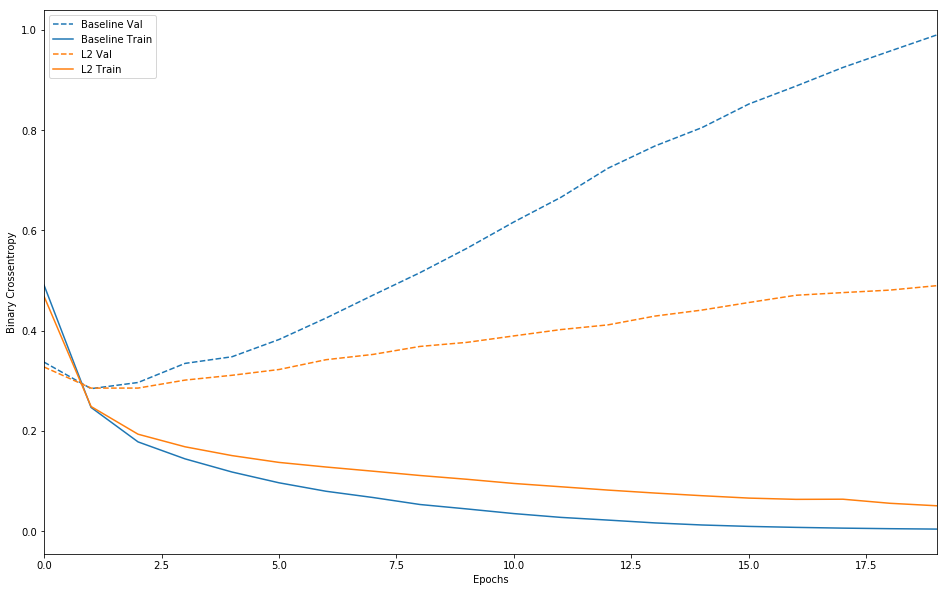

In [22]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [31]:
dpt_model = keras.models.Sequential([
  keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16, activation = tf.nn.relu),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data,test_labels),
                                  verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6219 - acc: 0.6471 - binary_crossentropy: 0.6219 - val_loss: 0.4913 - val_acc: 0.8483 - val_binary_crossentropy: 0.4913
Epoch 2/20
25000/25000 - 4s - loss: 0.4567 - acc: 0.8087 - binary_crossentropy: 0.4567 - val_loss: 0.3435 - val_acc: 0.8810 - val_binary_crossentropy: 0.3435
Epoch 3/20
25000/25000 - 5s - loss: 0.3513 - acc: 0.8724 - binary_crossentropy: 0.3513 - val_loss: 0.2899 - val_acc: 0.8886 - val_binary_crossentropy: 0.2899
Epoch 4/20
25000/25000 - 5s - loss: 0.2853 - acc: 0.9031 - binary_crossentropy: 0.2853 - val_loss: 0.2783 - val_acc: 0.8892 - val_binary_crossentropy: 0.2783
Epoch 5/20
25000/25000 - 5s - loss: 0.2495 - acc: 0.9196 - binary_crossentropy: 0.2495 - val_loss: 0.2811 - val_acc: 0.8890 - val_binary_crossentropy: 0.2811
Epoch 6/20
25000/25000 - 5s - loss: 0.2173 - acc: 0.9344 - binary_crossentropy: 0.2173 - val_loss: 0.2917 - val_acc: 0.8851 - val_binary_crossentropy: 0.2917
Ep

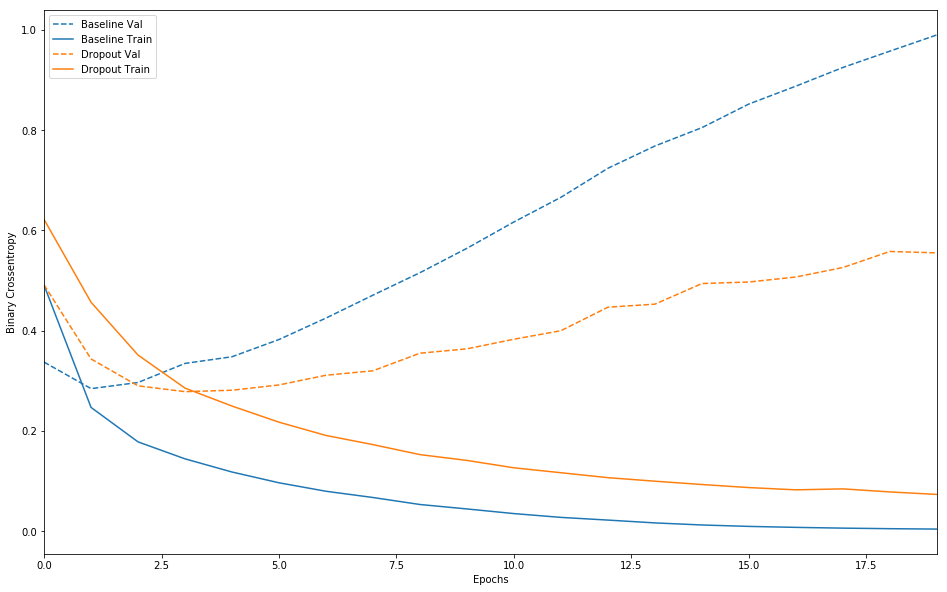

In [33]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [30]:
# ADDED BOTH DROPOUT AND REGULARIZERS
dpt_rez_model = keras.models.Sequential([
  keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS, )),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001), activation = tf.nn.relu),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

dpt_rez_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_rez_model_history = dpt_rez_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data,test_labels),
                                  verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6556 - acc: 0.6538 - binary_crossentropy: 0.6189 - val_loss: 0.5145 - val_acc: 0.8590 - val_binary_crossentropy: 0.4795
Epoch 2/20
25000/25000 - 5s - loss: 0.4875 - acc: 0.8126 - binary_crossentropy: 0.4507 - val_loss: 0.3773 - val_acc: 0.8836 - val_binary_crossentropy: 0.3380
Epoch 3/20
25000/25000 - 5s - loss: 0.4021 - acc: 0.8725 - binary_crossentropy: 0.3596 - val_loss: 0.3445 - val_acc: 0.8837 - val_binary_crossentropy: 0.2989
Epoch 4/20
25000/25000 - 5s - loss: 0.3524 - acc: 0.8941 - binary_crossentropy: 0.3036 - val_loss: 0.3303 - val_acc: 0.8886 - val_binary_crossentropy: 0.2783
Epoch 5/20
25000/25000 - 5s - loss: 0.3210 - acc: 0.9106 - binary_crossentropy: 0.2666 - val_loss: 0.3343 - val_acc: 0.8870 - val_binary_crossentropy: 0.2772
Epoch 6/20
25000/25000 - 5s - loss: 0.2949 - acc: 0.9215 - binary_crossentropy: 0.2353 - val_loss: 0.3465 - val_acc: 0.8825 - val_binary_crossentropy: 0.2845
Ep

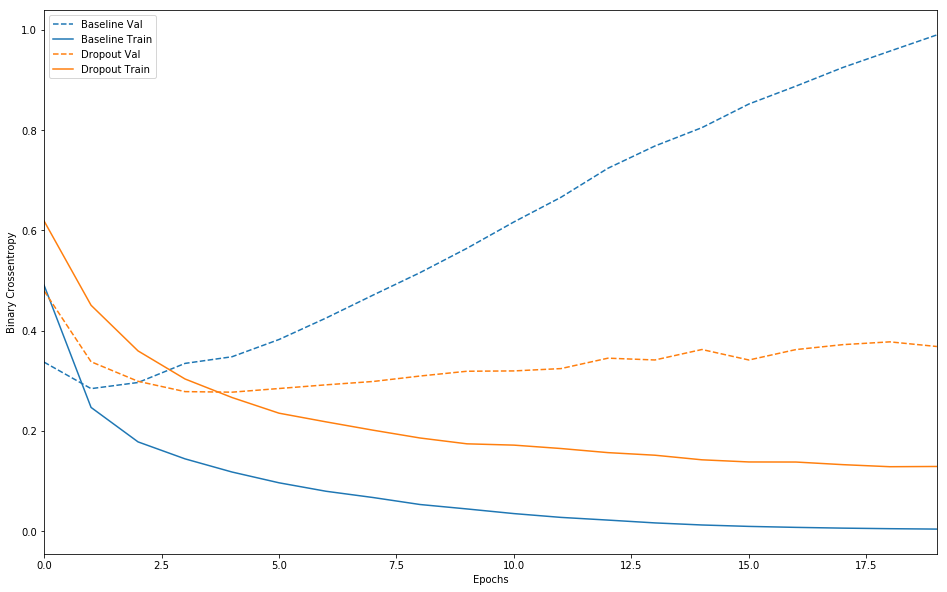

In [32]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_rez_model_history)])

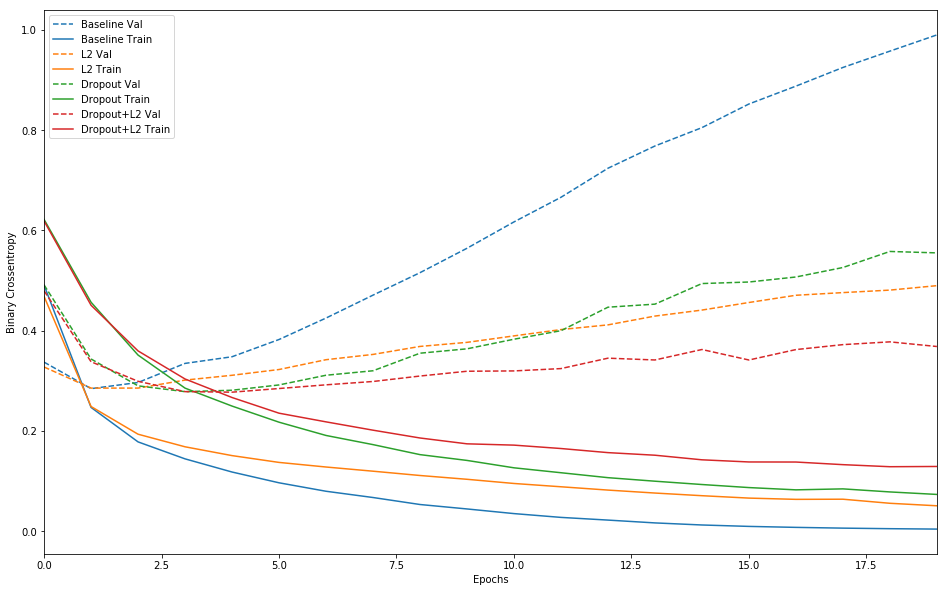

In [36]:
plot_history([('baseline', baseline_history),
              ('L2',l2_model_history),
              ('dropout', dpt_model_history),
              ('dropout+L2', dpt_rez_model_history)])